In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from numpy import loadtxt
import xgboost
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import *
import time
from optparse import OptionParser
import matplotlib
from matplotlib import pyplot as plt
from tikzplotlib import save as tikz_save

In [14]:
#Compressive_Data
df = pd.read_csv('../Dataset/compressive_strength.csv')
df.head()

,Cement (kg in a m^3 mixture),Blast Furnace Slag (kg in a m^3 mixture),Fly Ash (kg in a m^3 mixture),Water (kg in a m^3 mixture),Superplasticizer (kg in a m^3 mixture),Coarse Aggregate (kg in a m^3 mixture),Fine Aggregate (kg in a m^3 mixture),Age (day),"Concrete compressive strength (MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Cement (kg in a m^3 mixture)                       1133 non-null   float64
 1   Blast Furnace Slag (kg in a m^3 mixture)           1133 non-null   float64
 2   Fly Ash (kg in a m^3 mixture)                      1133 non-null   float64
 3   Water (kg in a m^3 mixture)                        1133 non-null   float64
 4   Superplasticizer (kg in a m^3 mixture)             1133 non-null   float64
 5   Coarse Aggregate (kg in a m^3 mixture)             1133 non-null   float64
 6   Fine Aggregate (kg in a m^3 mixture)               1133 non-null   float64
 7   Age (day)                                          1133 non-null   int64  
 8   Concrete compressive strength (MPa, megapascals)   1133 non-null   float64
dtypes: float6

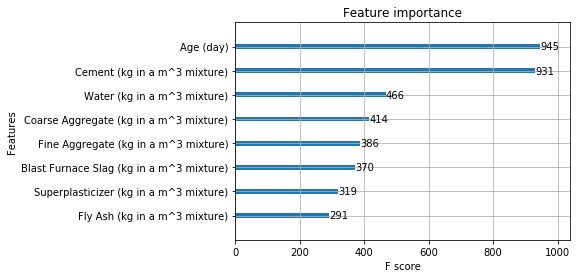

In [4]:
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance
from matplotlib import pyplot
x_train=df.drop(['Concrete compressive strength (MPa, megapascals) '],axis=1)
y_train=df['Concrete compressive strength (MPa, megapascals) ']
classifier=xgboost.XGBRegressor()
regressor=XGBRegressor()
model = XGBRegressor()
model.fit(x_train, y_train)
#FEATURE IMPORTANCE
plot_importance(model)
pyplot.show()

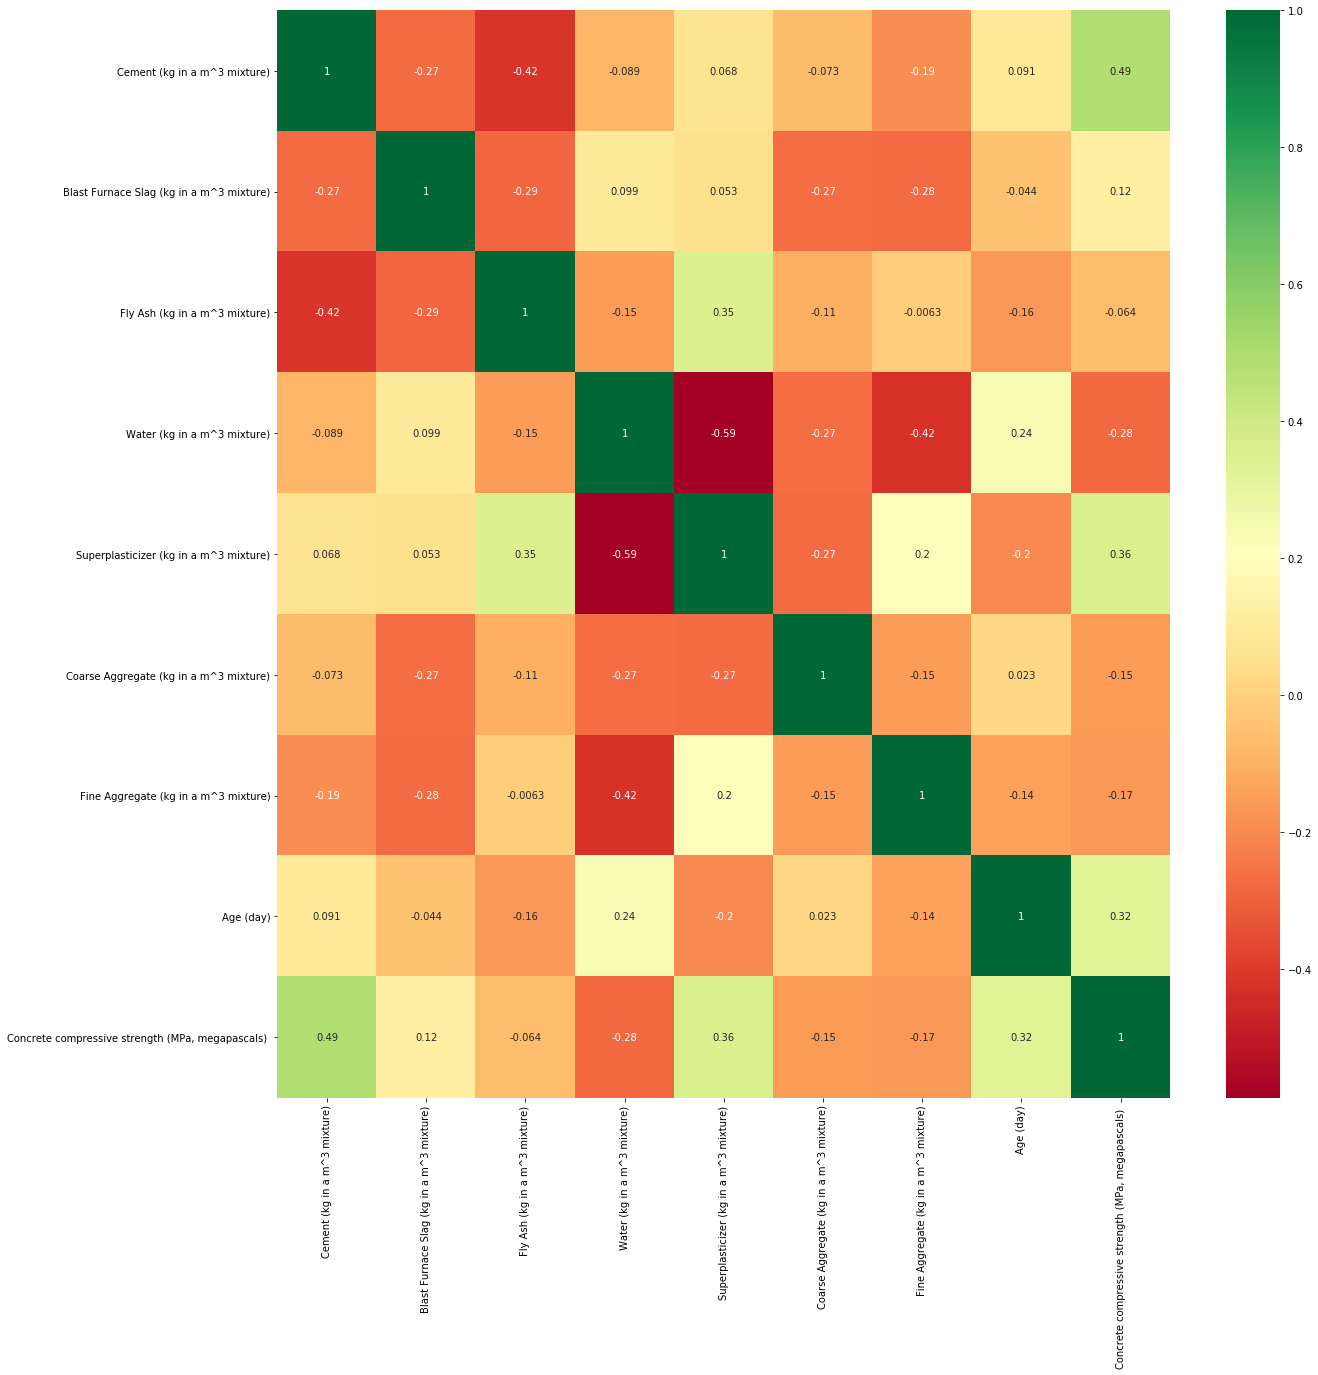

In [22]:
#get correlation of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [24]:
#tensile_data
dp = pd.read_csv('../Dataset/tensile_strength.csv')
dp.head()

,Compressive strength of cement fce (MPa),Tensile strength of cement fct (MPa),Curing age (day),Dmax of crushed stone (mm),Stone powder content in sand (%),Fineness modulus of sand,W/B,"Water to cement ratio, mw/mc",Water (kg/m3),Sand ratio (%),Slump (mm),"Compressive strength, fcu,t (MPa)","Splitting tensile strength, fst,t (MPa)"
0,46.8,8.0,3,31.5,5.0,3.34,0.56,0.56,180.0,44.0,50.0,32.5,1.18
1,46.8,8.0,3,31.5,9.0,3.27,0.56,0.56,180.0,44.0,70.0,28.7,1.13
2,46.8,8.0,3,31.5,13.0,2.77,0.56,0.56,180.0,44.0,50.0,28.5,1.56
3,46.8,8.0,7,31.5,5.0,3.34,0.56,0.56,180.0,44.0,50.0,33.5,1.39
4,46.8,8.0,7,31.5,9.0,3.27,0.56,0.56,180.0,44.0,70.0,34.9,1.38


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Compressive strength of cement fce (MPa)  714 non-null    float64
 1   Tensile strength of cement fct (MPa)      714 non-null    float64
 2   Curing age (day)                          714 non-null    int64  
 3   Dmax of crushed stone (mm)                714 non-null    float64
 4   Stone powder content in sand (%)          714 non-null    float64
 5   Fineness modulus of sand                  714 non-null    float64
 6   W/B                                       714 non-null    float64
 7   Water to cement ratio, mw/mc              714 non-null    float64
 8   Water (kg/m3)                             714 non-null    float64
 9   Sand ratio (%)                            714 non-null    float64
 10  Slump (mm)                            

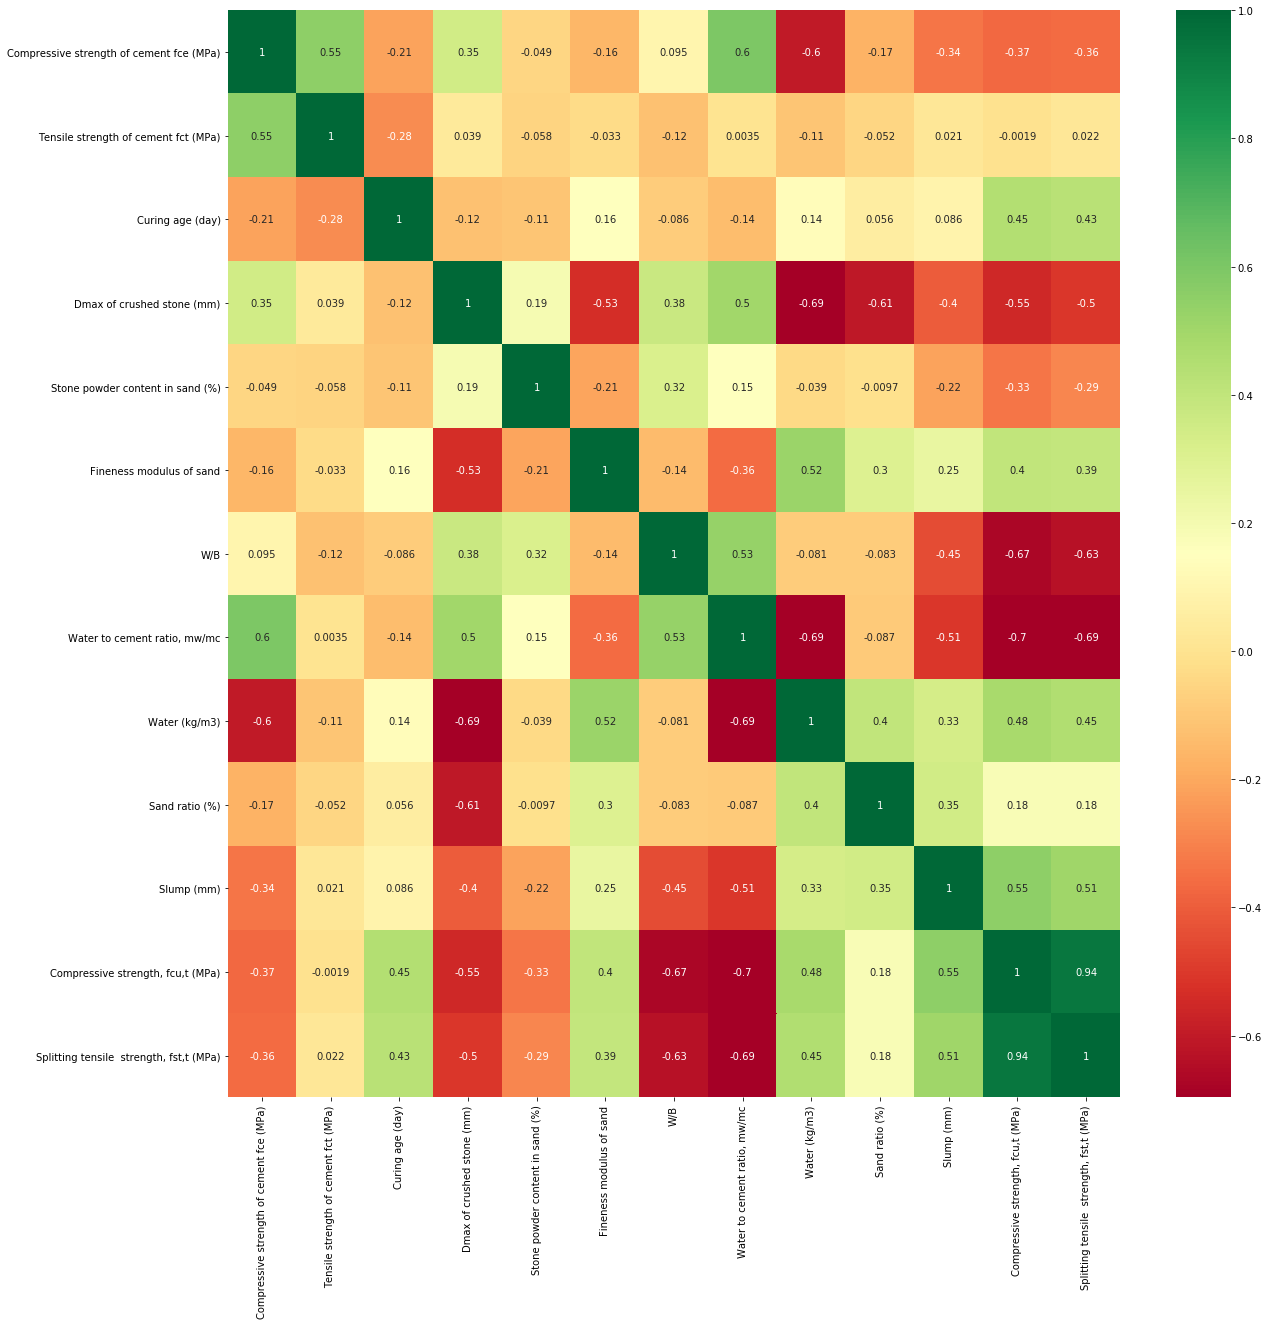

In [25]:
dp.info()
#get correlation of each features in dataset
corrmat = dp.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dp[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
#tensile_data_data2set
dy = pd.read_csv('../Dataset/data2set.csv')
dy.head()

,Curing age (day),"Compressive strength, fcu,t (MPa)","Splitting tensile strength, fst,t (MPa)"
0,3,32.5,1.18
1,3,28.7,1.13
2,3,28.5,1.56
3,7,33.5,1.39
4,7,34.9,1.38


In [5]:
def create_opts():
    n_run = 20

    # random_state
    random_state_opts = np.array([0, 1, 2, 42])  # 4
    random_state = np.random.choice(random_state_opts)

    # poly_degree
    poly_degree_opts = np.arange(1, 5, 1)  # 4
    poly_degree = np.random.choice(poly_degree_opts)

    parser = OptionParser()
    parser.add_option("--random_state", dest="random_state", type="int", default=random_state)
    parser.add_option("--poly_degree", dest="poly_degree", type="int", default=poly_degree)
    parser.add_option("--n_run", dest="n_run", type="int", default=n_run)
    (options, args) = parser.parse_args()
    return options

In [6]:
def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [15]:
# cross validation
# cross validation
def cv(random_state, poly_degree, model, problem, print_folds=True):
    interaction_only = False
    if problem.lower() == "compressive":
        data_file ='../Dataset/compressive_strength.csv'
        data = pd.read_csv(data_file)
        interaction_only = True

    elif problem.lower() == "tensile":
        data_file = '../Dataset/tensile_strength.csv'
        data = pd.read_csv(data_file)

    elif problem.lower() == "test2":
        data_file ='../Dataset/data2set.csv'
        data = pd.read_csv(data_file)
    else:
        print("The problem has to be compressive or tensile12 or test 2")
        return

    data = data.values
    n_data_cols = np.shape(data)[1]
    n_features = n_data_cols - 1

    # retrieve data for features
    X = np.array(data[:, :n_features])
    y = np.array(data[:, n_features:])
    # split into 10 folds with shuffle
    n_folds = 10
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=random_state)

    start_time = time.time()
    scores = []
    fold_index = 0

    for train_index, test_index in kf.split(X):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]

        X_scaler = MinMaxScaler(feature_range=(0, 1))
        X_train = X_scaler.fit_transform(X_train)
        X_test = X_scaler.transform(X_test)

        y_scaler = MinMaxScaler(feature_range=(0, 1))
        y_train = y_scaler.fit_transform(y_train)

        if poly_degree >= 1:
            poly = PolynomialFeatures(degree=poly_degree, interaction_only=interaction_only)
            X_train = poly.fit_transform(X_train)
            X_test = poly.transform(X_test)
            # print ('Total number of features: ', X_train.size)

        model.fit(X_train, y_train.ravel())

        y_pred = model.predict(X_test)
        y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1))

        # y_train_pred = model.predict(X_train)
        # y_train_pred = y_scaler.inverse_transform(y_train_pred.reshape(-1, 1))

        # y_train = y_scaler.inverse_transform(y_train)

        # Error measurements
        r_lcc = r2_score(y_test, y_pred) ** 0.5
        rmse = mean_squared_error(y_test, y_pred) ** 0.5
        # print("RMSE on train: %s" % mean_squared_error(y_train, y_train_pred) ** 0.5)
        # print("RMSE on test: %s" % rmse)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        scores.append([r_lcc, rmse, mae, mape])
        #if print_folds:
            #print("[fold {0}] r: {1:.5f}, rmse(MPa): {2:.5f}, mae(MPa): {3:.5f}, mape(%): {4:.5f}".
                  #format(fold_index, scores[fold_index][0], scores[fold_index][1], scores[fold_index][2], scores[fold_index][3]))
        fold_index += 1
    scores = np.array(scores)
    # barplot(["R2", "RMSE", "MAE", "MAPE"], scores.mean(0), scores.std(0), "Metrics", "Values",
    #         "Performance with different metrics")
    print('k-fold mean:              ', scores.mean(0))
    print('k-fold standard deviation:', scores.std(0))

    # Running time
    print('Running time: %.3fs ' % (time.time() - start_time))
    return scores.mean(0)[1].item()


In [8]:
def run_model(regressor, params, random_state, poly_degree, problem):
    model = regressor(**params)
    cv(random_state=random_state, poly_degree=poly_degree, model=model, problem=problem)

In [9]:
# run cross validation for XGB
def run_xgb(random_state, poly_degree, n_estimators, max_depth, learning_rate,objective, problem):
    print("Running XGB for %s data with random_state=%s, poly_degree=%s, "
          "n_estimators=%s, max_depth=%s, learning_rate=%s, objective=%s" %
          (problem, random_state, poly_degree, n_estimators, max_depth, learning_rate, objective))

    model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate,
                         objective=objective, random_state=random_state)
    cv(random_state, poly_degree, model, problem=problem)
    print("Finished running XGB for %s data with random_state=%s, poly_degree=%s, "
          "n_estimators=%s, max_depth=%s, learning_rate=%s, objective=%s\n" %
          (problem, random_state, poly_degree, n_estimators, max_depth, learning_rate, objective))


In [16]:
# n_estimators
n_estimators_opts = np.array([10,100, 200, 500, 1000, 1500, 2000, 2500, 3000, 5000, 10000])  # 10

# max_depth
max_depth_opts = np.arange(1, 7, 1)  # 6

# learning_rate
learning_rate_opts = np.array([0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15,0.2, 0.5,0.55,0.6])  # 9

# objective
objective_opts = np.array(["reg:logistic"])  # 2

random_state_opts = np.array([0, 1, 2, 42])
poly_degree_opts = np.arange(1, 5, 1)

for i in range(10): #Trail Purpose however user can take may 1000 if system performed fast.
    n_estimators = np.random.choice(n_estimators_opts)

    max_depth = np.random.choice(max_depth_opts)

    learning_rate = np.random.choice(learning_rate_opts)

    objective = np.random.choice(objective_opts)

    random_state = np.random.choice(random_state_opts)

    poly_degree = np.random.choice(poly_degree_opts)
    
    if __name__ == "__main__":
        run_xgb(random_state=random_state, poly_degree=poly_degree, n_estimators=n_estimators, max_depth=max_depth,
        learning_rate=learning_rate, objective=objective, problem="compressive")

Running XGB for compressive data with random_state=0, poly_degree=3, n_estimators=200, max_depth=1, learning_rate=0.55, objective=reg:logistic
k-fold mean:               [ 0.94382425  5.22693458  3.9206036  13.4529359 ]
k-fold standard deviation: [0.01359762 0.51231843 0.31159302 1.49199612]
Running time: 7.117s 
Finished running XGB for compressive data with random_state=0, poly_degree=3, n_estimators=200, max_depth=1, learning_rate=0.55, objective=reg:logistic

Running XGB for compressive data with random_state=0, poly_degree=2, n_estimators=200, max_depth=2, learning_rate=0.6, objective=reg:logistic
k-fold mean:               [ 0.95689579  4.5937907   3.27745305 11.18591407]
k-fold standard deviation: [0.00971867 0.32388508 0.19033086 0.89383448]
Running time: 4.787s 
Finished running XGB for compressive data with random_state=0, poly_degree=2, n_estimators=200, max_depth=2, learning_rate=0.6, objective=reg:logistic

Running XGB for compressive data with random_state=1, poly_degree=

In [17]:
#Tensile_Strength
for i in range(10): #Trail Purpose however user can take may 1000 if system performed fast.
    n_estimators = np.random.choice(n_estimators_opts)

    max_depth = np.random.choice(max_depth_opts)

    learning_rate = np.random.choice(learning_rate_opts)

    objective = np.random.choice(objective_opts)

    random_state = np.random.choice(random_state_opts)

    poly_degree = np.random.choice(poly_degree_opts)
    
    if __name__ == "__main__":
        run_xgb(random_state=random_state, poly_degree=poly_degree, n_estimators=n_estimators, max_depth=max_depth,
        learning_rate=learning_rate, objective=objective, problem="tensile")

Running XGB for tensile data with random_state=1, poly_degree=3, n_estimators=1500, max_depth=1, learning_rate=0.001, objective=reg:logistic
k-fold mean:               [ 0.84153217  0.71983808  0.5503202  31.90827124]
k-fold standard deviation: [0.01626632 0.05929759 0.05312542 6.32863654]
Running time: 128.018s 
Finished running XGB for tensile data with random_state=1, poly_degree=3, n_estimators=1500, max_depth=1, learning_rate=0.001, objective=reg:logistic

Running XGB for tensile data with random_state=2, poly_degree=2, n_estimators=2000, max_depth=2, learning_rate=0.02, objective=reg:logistic
k-fold mean:               [0.97495006 0.29021885 0.20298568 7.85329945]
k-fold standard deviation: [0.00779699 0.03946324 0.01848352 0.79899235]
Running time: 56.895s 
Finished running XGB for tensile data with random_state=2, poly_degree=2, n_estimators=2000, max_depth=2, learning_rate=0.02, objective=reg:logistic

Running XGB for tensile data with random_state=2, poly_degree=3, n_estimato

In [18]:
#Tensile_Strength-2Datasets
#Tensile_Strength
for i in range(10): #Trail Purpose however user can take may 1000 if system performed fast.
    n_estimators = np.random.choice(n_estimators_opts)

    max_depth = np.random.choice(max_depth_opts)

    learning_rate = np.random.choice(learning_rate_opts)

    objective = np.random.choice(objective_opts)

    random_state = np.random.choice(random_state_opts)

    poly_degree = np.random.choice(poly_degree_opts)
    
    if __name__ == "__main__":
        run_xgb(random_state=random_state, poly_degree=poly_degree, n_estimators=n_estimators, max_depth=max_depth,
        learning_rate=learning_rate, objective=objective, problem="test2")

Running XGB for test2 data with random_state=0, poly_degree=1, n_estimators=1500, max_depth=4, learning_rate=0.2, objective=reg:logistic
k-fold mean:               [ 0.93972197  0.45369872  0.31401269 11.77561658]
k-fold standard deviation: [0.0154252  0.06143332 0.04144126 1.5866144 ]
Running time: 16.006s 
Finished running XGB for test2 data with random_state=0, poly_degree=1, n_estimators=1500, max_depth=4, learning_rate=0.2, objective=reg:logistic

Running XGB for test2 data with random_state=0, poly_degree=1, n_estimators=3000, max_depth=5, learning_rate=0.1, objective=reg:logistic
k-fold mean:               [ 0.93688476  0.46370905  0.31758555 11.82966912]
k-fold standard deviation: [0.01621689 0.06364885 0.04462721 1.7492392 ]
Running time: 37.630s 
Finished running XGB for test2 data with random_state=0, poly_degree=1, n_estimators=3000, max_depth=5, learning_rate=0.1, objective=reg:logistic

Running XGB for test2 data with random_state=1, poly_degree=2, n_estimators=1000, max_

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in double_scalars


k-fold mean:               [        nan  1.24343913  1.03275337 62.69371496]
k-fold standard deviation: [        nan  0.07011866  0.07147178 10.71848832]
Running time: 0.363s 
Finished running XGB for test2 data with random_state=1, poly_degree=2, n_estimators=10, max_depth=6, learning_rate=0.02, objective=reg:logistic



In [19]:
#Compressive_Strength
if __name__ == "__main__":
        run_xgb(random_state=0, poly_degree=1, n_estimators=1000, max_depth=4,
        learning_rate=0.2, objective="reg:logistic", problem="compressive")

Running XGB for compressive data with random_state=0, poly_degree=1, n_estimators=1000, max_depth=4, learning_rate=0.2, objective=reg:logistic
k-fold mean:               [0.97098591 3.77479399 2.4678852  8.62577641]
k-fold standard deviation: [0.00754875 0.40470139 0.17086947 1.15181006]
Running time: 17.643s 
Finished running XGB for compressive data with random_state=0, poly_degree=1, n_estimators=1000, max_depth=4, learning_rate=0.2, objective=reg:logistic



In [20]:
#Tensile_Strength
if __name__ == "__main__":
        run_xgb(random_state=0, poly_degree=2, n_estimators=1000, max_depth=4,
        learning_rate=0.1, objective="reg:logistic", problem="tensile")

Running XGB for tensile data with random_state=0, poly_degree=2, n_estimators=1000, max_depth=4, learning_rate=0.1, objective=reg:logistic
k-fold mean:               [0.97969139 0.26533284 0.17395253 6.58536849]
k-fold standard deviation: [0.00512673 0.02853605 0.01537565 0.54014543]
Running time: 46.396s 
Finished running XGB for tensile data with random_state=0, poly_degree=2, n_estimators=1000, max_depth=4, learning_rate=0.1, objective=reg:logistic



In [21]:
#Tensile_strength_Data2set
if __name__ == "__main__":
        run_xgb(random_state=0, poly_degree=2, n_estimators=100, max_depth=2,
        learning_rate=0.2, objective="reg:logistic", problem="test2")

Running XGB for test2 data with random_state=0, poly_degree=2, n_estimators=100, max_depth=2, learning_rate=0.2, objective=reg:logistic
k-fold mean:               [ 0.95748736  0.38344614  0.27849155 10.66902566]
k-fold standard deviation: [0.01039819 0.05104489 0.03418287 1.29183603]
Running time: 0.986s 
Finished running XGB for test2 data with random_state=0, poly_degree=2, n_estimators=100, max_depth=2, learning_rate=0.2, objective=reg:logistic

